**Recycling robot example** (from Sutton, page 42)
References:
  - Gym documentation: https://gym.openai.com/

  

In [1]:
import numpy as np
from gym.envs.toy_text import discrete
import random
import matplotlib.pyplot as plt

##### TODO: Describir coloquialmente el modelo de sutton
Dos estados: high y low
Tres acciones: search, wait, recharge

##### TODO: Explicar lo básico de GYM

# Considere el modelo del robot de reciclaje descríto en Sutton Example 3.2

<img src="img/example3.2-1.png" width="500" align="left">

<img src="img/example3.2-2.png" width="500" align="left">

In [31]:
states = ["high", "low"]
actions = ["wait", "search", "recharge"]

P = {}

P[0] = {}
P[1] = {}

alpha = 0.9
beta = 1
r_wait = 0.5
r_search = 2.0

# definimos un ambiente discreto con las transiciones según el gráfico
def generar_ambiente(alpha=alpha, beta=beta, r_wait=r_wait, r_search=r_wait):
    P[0][0] = [(1.0, 0, r_wait, False)]
    P[0][1] = [(alpha, 0, r_search, False),
               (1-alpha, 1, r_search, False)]
    P[0][2] = [(1,0,0,False)]

    P[1][0] = [(1.0, 1, r_wait, False)]
    P[1][1] = [(beta, 1, r_search, False), 
               (1-beta, 0, -3.0, False)]
    P[1][2] = [(1.0, 0, 0.0, False)]
    env = discrete.DiscreteEnv(2, 3, P, [0.0, 1.0])
    return(env)
env = generar_ambiente()

c:\users\jack\gym\gym\__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


# Implemente la estrategia random para veinte episodios. 


Definir una acción aleatoria y ver que reward produce

In [32]:
print("Obs\tDone\tReward\tC.Reward\tAction")
verbose=True
history = []
rewardAcum = 0
for i in range(20):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        observation = env.reset()
    rewardAcum += reward
    elemHist = np.array([i, reward, rewardAcum])
    history.append(elemHist)
    if verbose:
        print(observation,"\t", done,"\t", reward, "\t", "%.3f" % (rewardAcum/(i+1)), "\t\t", action)
    env.close()

Obs	Done	Reward	C.Reward	Action
1 	 False 	 0.5 	 0.500 		 0
0 	 False 	 0.0 	 0.250 		 2
0 	 False 	 0.5 	 0.333 		 0
0 	 False 	 0.5 	 0.375 		 0
0 	 False 	 0.5 	 0.400 		 0
0 	 False 	 0.5 	 0.417 		 1
0 	 False 	 0.5 	 0.429 		 1
0 	 False 	 0 	 0.375 		 2
0 	 False 	 0.5 	 0.389 		 0
0 	 False 	 0.5 	 0.400 		 0
0 	 False 	 0.5 	 0.409 		 1
0 	 False 	 0.5 	 0.417 		 0
0 	 False 	 0.5 	 0.423 		 1
0 	 False 	 0 	 0.393 		 2
0 	 False 	 0 	 0.367 		 2
0 	 False 	 0.5 	 0.375 		 0
0 	 False 	 0.5 	 0.382 		 1
0 	 False 	 0.5 	 0.389 		 1
0 	 False 	 0.5 	 0.395 		 1
0 	 False 	 0.5 	 0.400 		 1


# Grafique la recompensa acumulada

In [33]:
# to numpy
history = np.array(history)
history[0:6]

array([[0. , 0.5, 0.5],
       [1. , 0. , 0.5],
       [2. , 0.5, 1. ],
       [3. , 0.5, 1.5],
       [4. , 0.5, 2. ],
       [5. , 0.5, 2.5]])

In [34]:
# so I can do this
history[0:6, 1]

array([0.5, 0. , 0.5, 0.5, 0.5, 0.5])

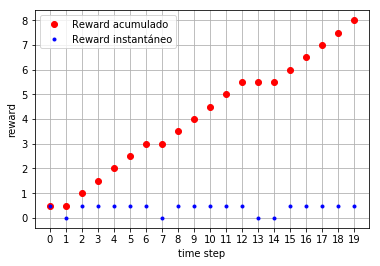

In [35]:
plt.grid()
plt.xlabel("time step")
plt.ylabel("reward")
plt.xticks(np.arange(0,len(history),1))
plt.plot(history[:,0], history[:,2], 'ro', label='Reward acumulado')
plt.plot(history[:,0], history[:,1], 'b.', label='Reward instantáneo')

plt.legend()

# Calcule de forma teórica V, la value function optima para cada estado

In [36]:
#x: actual state
#y's: next states
V(x) = reward + gamma (sum_y( p(y|a,x) * V(y) ))

SyntaxError: can't assign to function call (<ipython-input-36-0da05067ccdd>, line 3)

# Implemente el algoritmo de iteración de valor (Value iteration)

<img src="img/value-iteration-4.4.png" width="500" align="left">

  Evaluate the optimal value function given a full description of the environment dynamics
  
  

```
 Args:

        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
  
  Returns:
        Vector of length env.nS representing the value function.
```


  
   

In [37]:
for s in range(env.nS):
    for a in range(env.nA):
        print("state:",s, ", action:",a, " -> " ,env.P[s][a])

state: 0 , action: 0  ->  [(1.0, 0, 0.5, False)]
state: 0 , action: 1  ->  [(0.9, 0, 0.5, False), (0.09999999999999998, 1, 0.5, False)]
state: 0 , action: 2  ->  [(1, 0, 0, False)]
state: 1 , action: 0  ->  [(1.0, 1, 0.5, False)]
state: 1 , action: 1  ->  [(1, 1, 0.5, False), (0, 0, -3.0, False)]
state: 1 , action: 2  ->  [(1.0, 0, 0.0, False)]


In [55]:
# en cada estado, quiero calcular la value function optima;
# uso ecuacion de bellman, tomando el reward instantaneo y
# estimando futuros posibles rewards a partir de las acciones.

print("Obs\tDone\tReward\tC.Reward\tAction")
verbose=True
gamma=0.9 #discount factor
theta=0.1 #stop evaluation when updates are less than theta
update=10
#V = np.zeros((env.nS, env.nA))
V = np.zeros(env.nS)
epoch=0
while(update > theta):
    # bellman eq, for each state
    for s in range(env.nS):
        vPrev = V[s]
        maxReward = -float('inf')
        for a in range(env.nA):
            sumFutureRewards = 0
            for prob, next_state, reward, done in env.P[s][a]:
                #sum rewards over all possible next states
                sumFutureRewards += prob * (reward + gamma*V[next_state])
            
            # me quedo con el mayor reward entre todas las actions a posibles en
            # el estado s
            maxReward = max(maxReward, sumFutureRewards)
        print(epoch, ":", V)
        # me comporto greedy al elegir el valor maximo entre los obtenidos 
        V[s] = maxReward
        update = abs(V[s] - vPrev)
        #print(update)
    epoch += 1
print(V)


Obs	Done	Reward	C.Reward	Action
0 : [0. 0.]
0 : [0.5 0. ]
1 : [0.5 0.5]
1 : [0.95 0.5 ]
2 : [0.95 0.95]
2 : [1.355 0.95 ]
3 : [1.355 1.355]
3 : [1.7195 1.355 ]
4 : [1.7195 1.7195]
4 : [2.04755 1.7195 ]
5 : [2.04755 2.04755]
5 : [2.342795 2.04755 ]
6 : [2.342795 2.342795]
6 : [2.6085155 2.342795 ]
7 : [2.6085155 2.6085155]
7 : [2.84766395 2.6085155 ]
8 : [2.84766395 2.84766395]
8 : [3.06289756 2.84766395]
9 : [3.06289756 3.06289756]
9 : [3.2566078  3.06289756]
10 : [3.2566078 3.2566078]
10 : [3.43094702 3.2566078 ]
11 : [3.43094702 3.43094702]
11 : [3.58785232 3.43094702]
12 : [3.58785232 3.58785232]
12 : [3.72906709 3.58785232]
13 : [3.72906709 3.72906709]
13 : [3.85616038 3.72906709]
14 : [3.85616038 3.85616038]
14 : [3.97054434 3.85616038]
15 : [3.97054434 3.97054434]
15 : [4.07348991 3.97054434]
16 : [4.07348991 4.07348991]
16 : [4.16614092 4.07348991]
[4.16614092 4.16614092]


# Implemente el algoritmo de policy iteration

Definir primero una funcion de evaluación de politica,

```
Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
        
```

Despues una funcion de optimisacion de la politica:


```
 Policy Improvement Algorithm. Iteratively evaluates and improves a policy
    until an optimal policy is found.
    
    Args:
        env: The OpenAI envrionment.
        policy_eval_fn: Policy Evaluation function that takes 3 arguments:
            policy, env, discount_factor.
        discount_factor: gamma discount factor.
        
    Returns:
        A tuple (policy, V). 
        policy is the optimal policy, a matrix of shape [S, A] where each state s
        contains a valid probability distribution over actions.
        V is the value function for the optimal policy.
        
```





# Utilizando los 3 algoritmos, realice los experimentos para las siguientes configuraciones del ambiente.

In [0]:
exp1 = generar_ambiente(alpha=0.9, beta=0.9, r_search=3, r_wait=2)
exp2 = generar_ambiente(alpha=0.8, beta=0.5, r_search=3, r_wait=2)
exp3 = generar_ambiente(alpha=0.5, beta=0.5, r_search=3, r_wait=2)
exp4 = generar_ambiente(alpha=0.9, beta=0.6, r_search=1, r_wait=0.9)
exp5 = generar_ambiente(alpha=0.9, beta=0.6, r_search=1, r_wait=0.5)


# Utilizando el grafico de recompensa, compare las estrategias óptimas generadas con los experimentos anteriores contra la estrategia al azar.